<a href="https://colab.research.google.com/github/ifriedma/cosc470s24/blob/main/solutions/FastNeuralNetwork_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Hello, world** of neural networks
This code builds a simple neural network that can recognize handwritten 28x28 pixel digits.

Our first version will have 15 neurons in the hidden layer and 10 output neurons.

See image below:
http://neuralnetworksanddeeplearning.com/images/tikz12.png

How many weights in this network?
11760 weights in the first layer (784 * 15) and 150 weights in the second layer (15 * 10) = 11910 weights total
15 biases in the hidden layer and 10 biases in the output layer = 25 biases total.
11910 + 25 = 11935 parameters!

In [11]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 27.86 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn/nn


In [12]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

In [13]:
import numpy as np
print(np.shape(training_data))
print(np.shape(training_data[0][0]))
print(np.shape(training_data[0][1]))
print(training_data[0][1])

(50000, 2)
(784, 1)
(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [14]:
# average digit darkness
# step 1 - write a function that can calculate the darkness of a single image
def image_darkness(imgpixeldata):
  darkness_total = 0
  for x in imgpixeldata:
    darkness_total = darkness_total + x
  return darkness_total[0]

# step 2 - call that function on all the training images and calculate the average darkness of each digit
darkness = image_darkness(training_data[0][0])
whichimage = np.argmax(training_data[0][1])
print(f"The first image was a {whichimage} and its darkness was {darkness}")
darkness = image_darkness(training_data[1][0])
whichimage = np.argmax(training_data[1][1])
print(f"The second image was a {whichimage} and its darkness was {darkness}")

# define a 10-element list of darkness totals
darkness_totals = [0 for _ in range(10)]
# define a 10-elment list of digit counts
darkness_counts = [0 for _ in range(10)]

# iterate through each image and update the two data structures
for training_img in training_data:
  darkness = image_darkness(training_img[0]) # replace this with the correct function call!
  darkness_totals[whichimage] += darkness
  whichimage = np.argmax(training_img[1])
  darkness_counts[whichimage] += 1

# now calculate the averages
darkness_averages = [darkness_totals[i]/darkness_counts[i] for i in range(10)]

print(darkness_counts)
print(darkness_averages)

# step 3 - use those averages to classify all the test data images and count how many of each digit you get right
def find_closest(darkness, darkness_averages):
   # Calculate the difference(abs) between darkness and each average darkness
    differences = [abs(avg - darkness) for avg in darkness_averages]

    # Find the index of the minimum(min) difference, indicating the closest darkness average
    closest_index = differences.index(min(differences))

    return closest_index

correct_counts = [0 for _ in range(10)]
wrong_counts = [0 for _ in range(10)]

for imgdata, whichimage in test_data:
  darkness = image_darkness(imgdata)
  # see which darkness_average is closest to "darkness" and make that our classification for this image
  closest_digit = find_closest(darkness, darkness_averages)
  if closest_digit == whichimage:
    correct_counts[whichimage] += 1
  else:
    wrong_counts[whichimage] += 1

# now that we have our correct/wrong counts, turn that into accuracies
digit_accuracies = [correct_counts[i]/(correct_counts[i]+wrong_counts[i]) for i in range(10)]
print(digit_accuracies)

The first image was a 5 and its darkness was 107.51953125
The second image was a 0 and its darkness was 121.46484375
[4932, 5678, 4968, 5101, 4859, 4506, 4951, 5175, 4842, 4988]
[101.94928923991282, 102.97507512548432, 102.14652762052134, 102.27288613752205, 102.61187840862317, 102.63065045217488, 102.3433397293476, 101.93702445652174, 101.99264573007022, 101.81347186372294]
[0.0, 0.02907488986784141, 0.0009689922480620155, 0.0019801980198019802, 0.0010183299389002036, 0.002242152466367713, 0.0020876826722338203, 0.0019455252918287938, 0.004106776180698152, 0.6174430128840436]


In [15]:
print(np.shape(test_data))
print(np.shape(test_data[0]))
print(test_data[0][1])


(10000, 2)
(2,)
7


In [16]:
# part 2 - use this default configuration and the following hyper-parameters
#   epochs - 30
#   batch size - 10
#   learning rate - 3.0
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 8234 / 10000
Epoch 1 : 9184 / 10000
Epoch 2 : 9318 / 10000
Epoch 3 : 9333 / 10000
Epoch 4 : 9362 / 10000
Epoch 5 : 9384 / 10000
Epoch 6 : 9444 / 10000
Epoch 7 : 9382 / 10000
Epoch 8 : 9441 / 10000
Epoch 9 : 9448 / 10000
Epoch 10 : 9444 / 10000
Epoch 11 : 9457 / 10000
Epoch 12 : 9449 / 10000
Epoch 13 : 9459 / 10000
Epoch 14 : 9461 / 10000
Epoch 15 : 9457 / 10000
Epoch 16 : 9455 / 10000
Epoch 17 : 9463 / 10000
Epoch 18 : 9464 / 10000
Epoch 19 : 9475 / 10000
Epoch 20 : 9434 / 10000
Epoch 21 : 9484 / 10000
Epoch 22 : 9487 / 10000
Epoch 23 : 9488 / 10000
Epoch 24 : 9485 / 10000
Epoch 25 : 9470 / 10000
Epoch 26 : 9489 / 10000
Epoch 27 : 9478 / 10000
Epoch 28 : 9495 / 10000
Epoch 29 : 9495 / 10000


In [17]:
import numpy as np
a = net.feedforward(test_data[2][0])
print(a)
print(np.argmax(a))
print(test_data[2][1])

# per digit accuracies
# loop through the test data again
# calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]
for (x, y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
  digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/digit_counts[i] for i in range(10)]
print(accuracies)

[[1.18491441e-13]
 [9.99776586e-01]
 [1.18187438e-05]
 [2.84739734e-06]
 [3.22160856e-08]
 [3.35859013e-05]
 [4.41586043e-06]
 [3.91118435e-05]
 [3.39021886e-03]
 [1.20291168e-07]]
1
1
[957, 1118, 975, 951, 936, 827, 921, 973, 905, 932]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[0.976530612244898, 0.9850220264317181, 0.9447674418604651, 0.9415841584158415, 0.9531568228105907, 0.9271300448430493, 0.9613778705636743, 0.9464980544747081, 0.9291581108829569, 0.9236868186323092]


In [18]:
print(np.shape(net.weights[0]))
print(net.weights[0])

(30, 784)
[[-1.45703795  0.07847585 -0.52754756 ...  0.98729917 -2.17304283
  -0.00271768]
 [-1.4755841   0.27522848  1.18053758 ... -1.13641965 -0.19404105
   0.79332824]
 [ 0.290793    0.25550975  1.7855057  ...  0.01069715 -2.09493813
  -0.27738659]
 ...
 [-2.54916768  0.09822973  0.59908476 ... -1.47619687  0.06114972
  -1.10225908]
 [-0.9887885   0.41138918 -1.53247894 ...  0.17896676  0.9322645
  -0.11103201]
 [-0.0999654   1.1885623   0.40553775 ... -0.41338757  1.6562466
  -1.57232064]]


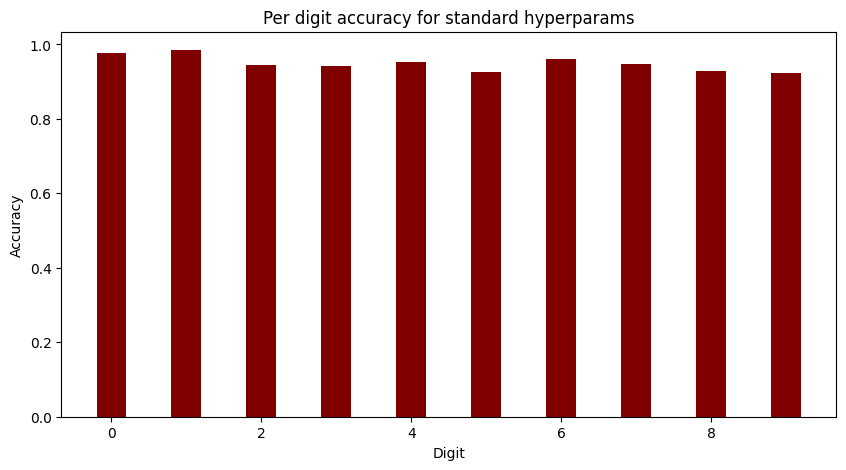

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
  #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperparams")
plt.show()

In [20]:
print(np.shape(net.weights[1]))
print(net.weights[1])

(10, 30)
[[ 3.77269736 -5.18775836 -3.65354483 -3.11264847  0.9962266  -5.88421721
   3.01462644  0.19028508 -0.5533501  -3.43821734  2.40865612 -3.22477993
  -0.47981196 -3.58567434 -0.52425317 -1.11231207 -1.93955097 -1.31021361
   4.79104245  5.27248802 -5.8227673   0.60049827  1.04910846 -2.61151651
  -0.95354617  0.2460337  -2.74811964 -3.76770905 -2.31582349  2.14507868]
 [-0.79811092  6.134574   -0.63363439  4.17864883  1.10692915  3.29619161
  -1.73047265 -3.16142536 -0.87639787 -2.08861762 -1.46109947 -0.77424878
  -3.45841286 -1.65374072  2.11586768 -3.29927897 -2.11478758  5.47204898
  -2.9300168  -3.80287212  1.55263225 -4.0484821   3.47909351 -1.33431738
  -1.37462408 -0.93701224 -4.12762369 -2.01746934 -3.10474171  0.04707076]
 [-7.08499251  0.4128557  -4.54831792  5.60797489  0.31526172  2.06159283
   2.85084651 -0.23477989 -1.22352516 -1.52260587  0.58942614 -0.89630047
   0.95065243 -2.26957935 -3.50091858  5.04158156 -4.13253662 -0.88104236
   8.86041829 -3.18154339 -

In [21]:
# part 3 - experiment with different hyper parameters
#   epochs - 5, 15, 30, 60 (batch size 10, learning 3.0)
#   batch - 5, 10, 50, 100 (epochs 30, learning 3.0)
#   learning rate - 1.0, 3.0, 5.0 (epochs 30, batch size 10)
# EPOCHS

net = network.Network([784, 30, 10])
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)

Epoch 0 : 9136 / 10000
Epoch 1 : 9259 / 10000
Epoch 2 : 9277 / 10000
Epoch 3 : 9302 / 10000
Epoch 4 : 9389 / 10000


In [22]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 15, 10, 3.0, test_data=test_data)

Epoch 0 : 9048 / 10000
Epoch 1 : 9253 / 10000
Epoch 2 : 9319 / 10000
Epoch 3 : 9265 / 10000
Epoch 4 : 9368 / 10000
Epoch 5 : 9404 / 10000
Epoch 6 : 9445 / 10000
Epoch 7 : 9407 / 10000
Epoch 8 : 9454 / 10000
Epoch 9 : 9448 / 10000
Epoch 10 : 9454 / 10000
Epoch 11 : 9479 / 10000
Epoch 12 : 9460 / 10000
Epoch 13 : 9482 / 10000
Epoch 14 : 9487 / 10000


In [23]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 8192 / 10000
Epoch 1 : 9241 / 10000
Epoch 2 : 9294 / 10000
Epoch 3 : 9267 / 10000
Epoch 4 : 9327 / 10000
Epoch 5 : 9377 / 10000
Epoch 6 : 9424 / 10000
Epoch 7 : 9424 / 10000
Epoch 8 : 9428 / 10000
Epoch 9 : 9434 / 10000
Epoch 10 : 9439 / 10000
Epoch 11 : 9473 / 10000
Epoch 12 : 9455 / 10000
Epoch 13 : 9461 / 10000
Epoch 14 : 9481 / 10000
Epoch 15 : 9469 / 10000
Epoch 16 : 9475 / 10000
Epoch 17 : 9485 / 10000
Epoch 18 : 9485 / 10000
Epoch 19 : 9492 / 10000
Epoch 20 : 9493 / 10000
Epoch 21 : 9477 / 10000
Epoch 22 : 9509 / 10000
Epoch 23 : 9496 / 10000
Epoch 24 : 9512 / 10000
Epoch 25 : 9467 / 10000
Epoch 26 : 9504 / 10000
Epoch 27 : 9499 / 10000
Epoch 28 : 9489 / 10000
Epoch 29 : 9509 / 10000


In [24]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 60, 10, 3.0, test_data=test_data)

Epoch 0 : 8228 / 10000
Epoch 1 : 8309 / 10000
Epoch 2 : 8407 / 10000
Epoch 3 : 8456 / 10000
Epoch 4 : 8465 / 10000
Epoch 5 : 8476 / 10000
Epoch 6 : 8498 / 10000
Epoch 7 : 8515 / 10000
Epoch 8 : 8518 / 10000
Epoch 9 : 8536 / 10000
Epoch 10 : 8567 / 10000
Epoch 11 : 8575 / 10000
Epoch 12 : 8553 / 10000
Epoch 13 : 8534 / 10000
Epoch 14 : 8579 / 10000
Epoch 15 : 8569 / 10000
Epoch 16 : 8566 / 10000
Epoch 17 : 8578 / 10000
Epoch 18 : 8550 / 10000
Epoch 19 : 8593 / 10000
Epoch 20 : 8574 / 10000
Epoch 21 : 8572 / 10000
Epoch 22 : 8554 / 10000
Epoch 23 : 8589 / 10000
Epoch 24 : 8548 / 10000
Epoch 25 : 8573 / 10000
Epoch 26 : 8557 / 10000
Epoch 27 : 8566 / 10000
Epoch 28 : 8585 / 10000
Epoch 29 : 8595 / 10000
Epoch 30 : 8612 / 10000
Epoch 31 : 8678 / 10000
Epoch 32 : 9460 / 10000
Epoch 33 : 9430 / 10000
Epoch 34 : 9423 / 10000
Epoch 35 : 9418 / 10000
Epoch 36 : 9433 / 10000
Epoch 37 : 9424 / 10000
Epoch 38 : 9444 / 10000
Epoch 39 : 9443 / 10000
Epoch 40 : 9412 / 10000
Epoch 41 : 9464 / 10000
Ep

In [25]:
# BATCH SIZE

net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 5, 3.0, test_data=test_data)

Epoch 0 : 8240 / 10000
Epoch 1 : 8344 / 10000
Epoch 2 : 8447 / 10000
Epoch 3 : 8536 / 10000
Epoch 4 : 8532 / 10000
Epoch 5 : 8534 / 10000
Epoch 6 : 8540 / 10000
Epoch 7 : 8557 / 10000
Epoch 8 : 8552 / 10000
Epoch 9 : 9437 / 10000
Epoch 10 : 9447 / 10000
Epoch 11 : 9431 / 10000
Epoch 12 : 9458 / 10000
Epoch 13 : 9461 / 10000
Epoch 14 : 9486 / 10000
Epoch 15 : 9478 / 10000
Epoch 16 : 9476 / 10000
Epoch 17 : 9512 / 10000
Epoch 18 : 9498 / 10000
Epoch 19 : 9475 / 10000
Epoch 20 : 9493 / 10000
Epoch 21 : 9462 / 10000
Epoch 22 : 9505 / 10000
Epoch 23 : 9486 / 10000
Epoch 24 : 9511 / 10000
Epoch 25 : 9486 / 10000
Epoch 26 : 9516 / 10000
Epoch 27 : 9513 / 10000
Epoch 28 : 9514 / 10000
Epoch 29 : 9507 / 10000


In [26]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 9083 / 10000
Epoch 1 : 9263 / 10000
Epoch 2 : 9314 / 10000
Epoch 3 : 9401 / 10000
Epoch 4 : 9401 / 10000
Epoch 5 : 9415 / 10000
Epoch 6 : 9466 / 10000
Epoch 7 : 9488 / 10000
Epoch 8 : 9480 / 10000
Epoch 9 : 9481 / 10000
Epoch 10 : 9482 / 10000
Epoch 11 : 9481 / 10000
Epoch 12 : 9504 / 10000
Epoch 13 : 9495 / 10000
Epoch 14 : 9518 / 10000
Epoch 15 : 9522 / 10000
Epoch 16 : 9490 / 10000
Epoch 17 : 9520 / 10000
Epoch 18 : 9559 / 10000
Epoch 19 : 9552 / 10000
Epoch 20 : 9550 / 10000
Epoch 21 : 9532 / 10000
Epoch 22 : 9517 / 10000
Epoch 23 : 9537 / 10000
Epoch 24 : 9539 / 10000
Epoch 25 : 9530 / 10000
Epoch 26 : 9527 / 10000
Epoch 27 : 9536 / 10000
Epoch 28 : 9550 / 10000
Epoch 29 : 9531 / 10000


In [27]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 50, 3.0, test_data=test_data)

Epoch 0 : 7590 / 10000
Epoch 1 : 8876 / 10000
Epoch 2 : 9033 / 10000
Epoch 3 : 9123 / 10000
Epoch 4 : 9180 / 10000
Epoch 5 : 9226 / 10000
Epoch 6 : 9256 / 10000
Epoch 7 : 9277 / 10000
Epoch 8 : 9286 / 10000
Epoch 9 : 9296 / 10000
Epoch 10 : 9319 / 10000
Epoch 11 : 9347 / 10000
Epoch 12 : 9339 / 10000
Epoch 13 : 9360 / 10000
Epoch 14 : 9380 / 10000
Epoch 15 : 9389 / 10000
Epoch 16 : 9401 / 10000
Epoch 17 : 9386 / 10000
Epoch 18 : 9405 / 10000
Epoch 19 : 9410 / 10000
Epoch 20 : 9414 / 10000
Epoch 21 : 9413 / 10000
Epoch 22 : 9419 / 10000
Epoch 23 : 9413 / 10000
Epoch 24 : 9426 / 10000
Epoch 25 : 9411 / 10000
Epoch 26 : 9437 / 10000
Epoch 27 : 9424 / 10000
Epoch 28 : 9410 / 10000
Epoch 29 : 9423 / 10000


In [28]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 100, 3.0, test_data=test_data)

Epoch 0 : 6033 / 10000
Epoch 1 : 7542 / 10000
Epoch 2 : 7843 / 10000
Epoch 3 : 8015 / 10000
Epoch 4 : 8066 / 10000
Epoch 5 : 8126 / 10000
Epoch 6 : 8162 / 10000
Epoch 7 : 8197 / 10000
Epoch 8 : 8221 / 10000
Epoch 9 : 8238 / 10000
Epoch 10 : 8280 / 10000
Epoch 11 : 8290 / 10000
Epoch 12 : 8307 / 10000
Epoch 13 : 8303 / 10000
Epoch 14 : 8329 / 10000
Epoch 15 : 8325 / 10000
Epoch 16 : 8345 / 10000
Epoch 17 : 8329 / 10000
Epoch 18 : 8351 / 10000
Epoch 19 : 8366 / 10000
Epoch 20 : 8368 / 10000
Epoch 21 : 8373 / 10000
Epoch 22 : 8377 / 10000
Epoch 23 : 8366 / 10000
Epoch 24 : 8384 / 10000
Epoch 25 : 8383 / 10000
Epoch 26 : 8379 / 10000
Epoch 27 : 8398 / 10000
Epoch 28 : 8391 / 10000
Epoch 29 : 8397 / 10000


In [29]:
# LEARNING RATE

net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 1.0, test_data=test_data)

Epoch 0 : 7337 / 10000
Epoch 1 : 7484 / 10000
Epoch 2 : 7531 / 10000
Epoch 3 : 7581 / 10000
Epoch 4 : 8401 / 10000
Epoch 5 : 8425 / 10000
Epoch 6 : 8463 / 10000
Epoch 7 : 8506 / 10000
Epoch 8 : 8498 / 10000
Epoch 9 : 8513 / 10000
Epoch 10 : 8528 / 10000
Epoch 11 : 8522 / 10000
Epoch 12 : 8550 / 10000
Epoch 13 : 8555 / 10000
Epoch 14 : 8549 / 10000
Epoch 15 : 8541 / 10000
Epoch 16 : 8559 / 10000
Epoch 17 : 9411 / 10000
Epoch 18 : 9399 / 10000
Epoch 19 : 9410 / 10000
Epoch 20 : 9439 / 10000
Epoch 21 : 9438 / 10000
Epoch 22 : 9449 / 10000
Epoch 23 : 9449 / 10000
Epoch 24 : 9453 / 10000
Epoch 25 : 9452 / 10000
Epoch 26 : 9462 / 10000
Epoch 27 : 9464 / 10000
Epoch 28 : 9463 / 10000
Epoch 29 : 9476 / 10000


In [30]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 8217 / 10000
Epoch 1 : 8313 / 10000
Epoch 2 : 8342 / 10000
Epoch 3 : 8400 / 10000
Epoch 4 : 8426 / 10000
Epoch 5 : 8418 / 10000
Epoch 6 : 9333 / 10000
Epoch 7 : 9379 / 10000
Epoch 8 : 9296 / 10000
Epoch 9 : 9390 / 10000
Epoch 10 : 9386 / 10000
Epoch 11 : 9421 / 10000
Epoch 12 : 9415 / 10000
Epoch 13 : 9394 / 10000
Epoch 14 : 9434 / 10000
Epoch 15 : 9441 / 10000
Epoch 16 : 9444 / 10000
Epoch 17 : 9451 / 10000
Epoch 18 : 9486 / 10000
Epoch 19 : 9479 / 10000
Epoch 20 : 9472 / 10000
Epoch 21 : 9486 / 10000
Epoch 22 : 9466 / 10000
Epoch 23 : 9478 / 10000
Epoch 24 : 9456 / 10000
Epoch 25 : 9456 / 10000
Epoch 26 : 9448 / 10000
Epoch 27 : 9461 / 10000
Epoch 28 : 9470 / 10000
Epoch 29 : 9461 / 10000


In [31]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 5.0, test_data=test_data)

Epoch 0 : 9153 / 10000
Epoch 1 : 9254 / 10000
Epoch 2 : 9303 / 10000
Epoch 3 : 9369 / 10000
Epoch 4 : 9362 / 10000
Epoch 5 : 9413 / 10000
Epoch 6 : 9428 / 10000
Epoch 7 : 9390 / 10000
Epoch 8 : 9400 / 10000
Epoch 9 : 9446 / 10000
Epoch 10 : 9435 / 10000
Epoch 11 : 9472 / 10000
Epoch 12 : 9486 / 10000
Epoch 13 : 9491 / 10000
Epoch 14 : 9527 / 10000
Epoch 15 : 9492 / 10000
Epoch 16 : 9501 / 10000
Epoch 17 : 9504 / 10000
Epoch 18 : 9461 / 10000
Epoch 19 : 9494 / 10000
Epoch 20 : 9521 / 10000
Epoch 21 : 9492 / 10000
Epoch 22 : 9508 / 10000
Epoch 23 : 9500 / 10000
Epoch 24 : 9464 / 10000
Epoch 25 : 9491 / 10000
Epoch 26 : 9509 / 10000
Epoch 27 : 9506 / 10000
Epoch 28 : 9483 / 10000
Epoch 29 : 9506 / 10000
